In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing sys
import sys
  
# adding src to the system path
sys.path.insert(0, '/Users/shengzhexiang/trick-or-treat-backtesting/src')

from preprocessing import null_check, dist_plot

### 0. Import Data

In [17]:
df_qqq = pd.read_csv('~/trick-or-treat-backtesting/data/QQQ.csv')
print(df_qqq.shape)
df_qqq.head(1)

(1113, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,119.269997,119.989998,118.889999,119.540001,115.701859,22307600


In [18]:
df_spy = pd.read_csv('~/trick-or-treat-backtesting/data/SPY.csv')
print(df_spy.shape)
df_spy.head(1)

(1113, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,225.039993,225.830002,223.880005,225.240005,208.213501,91366500


### 1. Quality Check

#### 1.1 Missing Check

In [5]:
print("QQQ data check summary")
null_check(df_qqq)
print("======================")
print("SPY data check summary")
null_check(df_spy)

QQQ data check summary
Column Date has 0.0 % of missing records
Column Open has 0.0 % of missing records
Column High has 0.0 % of missing records
Column Low has 0.0 % of missing records
Column Close has 0.0 % of missing records
Column Adj Close has 0.0 % of missing records
Column Volume has 0.0 % of missing records
SPY data check summary
Column Date has 0.0 % of missing records
Column Open has 0.0 % of missing records
Column High has 0.0 % of missing records
Column Low has 0.0 % of missing records
Column Close has 0.0 % of missing records
Column Adj Close has 0.0 % of missing records
Column Volume has 0.0 % of missing records


#### 1.2 Descriptive Statistics

In [6]:
df_qqq.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1.113000e+03
mean,200.069713,201.482983,198.484250,200.113684,197.694670,3.876813e+07
std,59.296119,59.824427,58.602801,59.276564,60.486119,2.238608e+07
min,119.269997,119.989998,118.889999,119.540001,115.701859,7.089000e+06
25%,158.880005,160.800003,157.389999,159.080002,155.713531,2.378670e+07
50%,181.490005,182.929993,180.289993,181.830002,178.643066,3.237930e+07
75%,225.639999,227.929993,223.589996,226.860001,225.771271,4.588830e+07
max,342.369995,342.799988,340.079987,342.010010,342.010010,1.481737e+08


In [7]:
df_spy.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1.113000e+03
mean,293.845427,295.401249,292.117484,293.866002,283.814865,8.394674e+07
std,46.838743,47.074947,46.573526,46.849712,51.789912,4.664118e+07
min,225.039993,225.830002,218.259995,222.949997,208.213501,2.027000e+07
25%,262.549988,264.429993,259.850006,262.869995,248.722015,5.637480e+07
50%,283.200012,284.700012,281.359985,283.299988,271.976501,7.116970e+07
75%,316.869995,319.760010,314.369995,317.320007,311.177032,9.555530e+07
max,422.570007,422.920013,419.790009,422.600006,422.600006,3.922207e+08


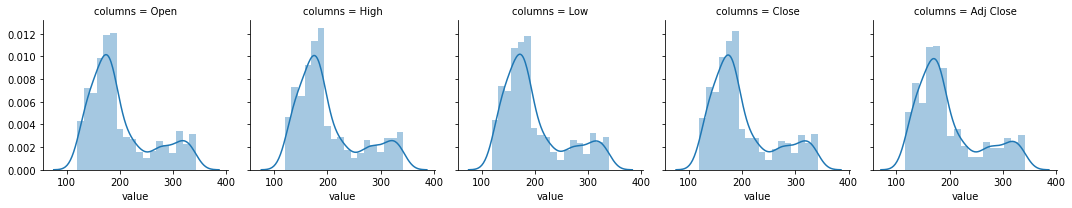

In [8]:
dist_plot(df_qqq, drop_list = ['Date','Volume'])

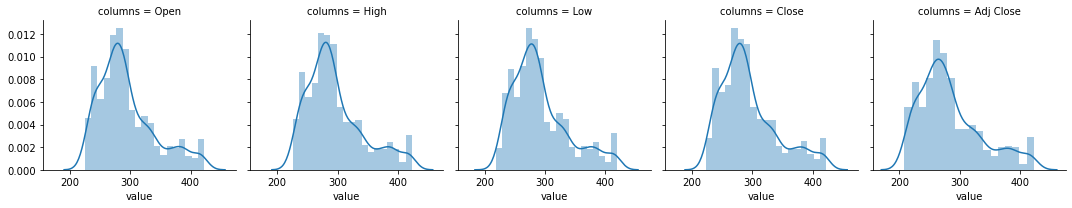

In [9]:
dist_plot(df_spy, drop_list = ['Date','Volume'])

#### 1.3  Correlation

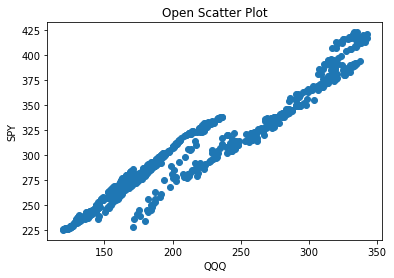

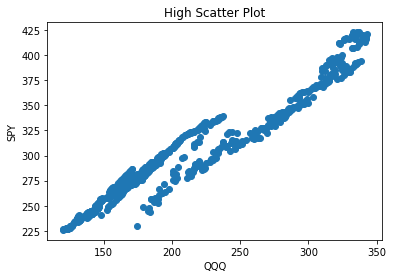

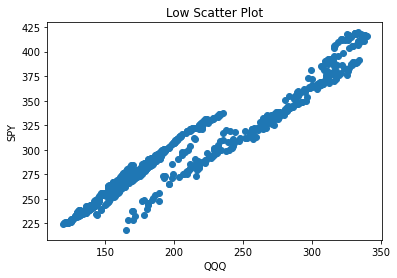

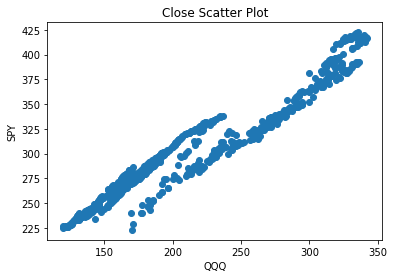

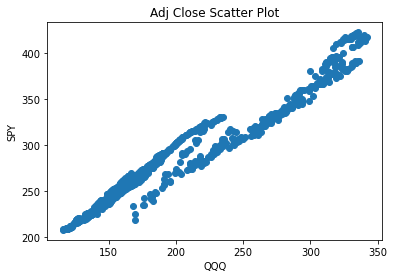

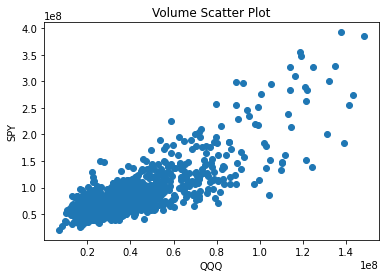

In [10]:
columns = list(df_qqq.columns)
columns.remove('Date')
for col in columns:
    title = col + ' Scatter Plot'
    plt.scatter(df_qqq[col], df_spy[col])
    plt.title(title)
    plt.xlabel('QQQ')
    plt.ylabel('SPY')
    plt.show()

#### 1.4 Time Series Visualization

In [19]:
columns = list(df_qqq.columns)
columns.remove('Date')

In [22]:
df_qqq = df_qqq.set_index(pd.to_datetime(df_qqq['Date']))
df_spy = df_spy.set_index(pd.to_datetime(df_spy['Date']))

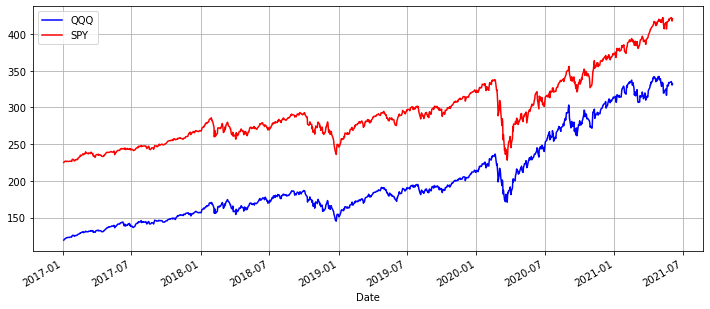

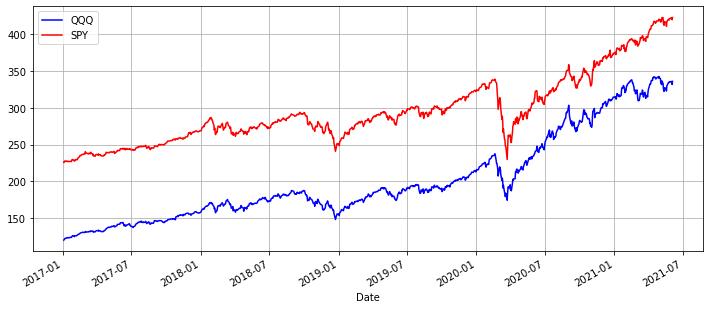

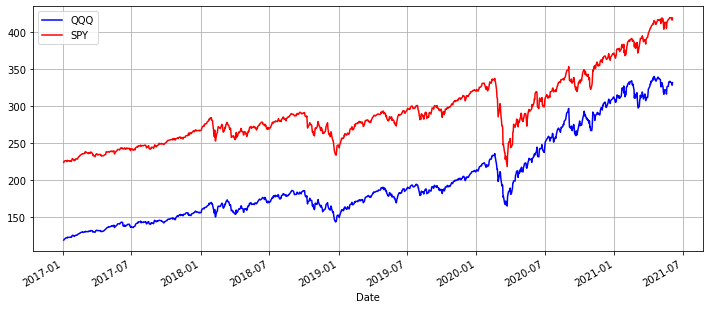

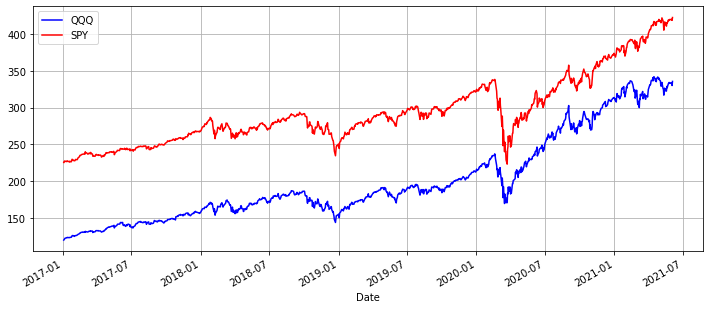

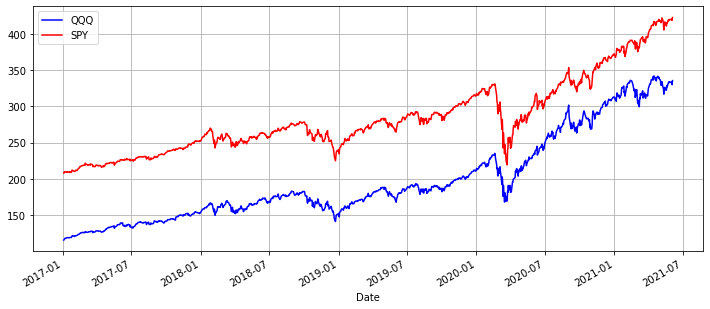

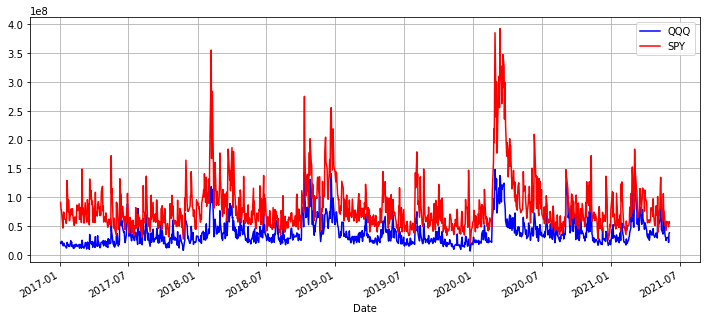

In [28]:
for col in columns:
    plt.figure(figsize=(12,5))
    plt.xlabel('Date')

    ax1 = df_qqq[col].plot(color='blue', grid=True, label='QQQ',legend=True)
    ax2 = df_spy[col].plot(color='red', grid=True, label='SPY',legend=True)

    plt.show()

<br><br><br>
### 2. Preprocessing

In [31]:
# Merge into a single dataframe
df_qqq = df_qqq.rename(columns={"Open": "Open_QQQ"
                              , "High": "High_QQQ"
                              , "Low" : "Low_QQQ"
                              , "Close": "Close_QQQ"
                              , "Adj Close":"Adj_Close_QQQ"
                              , "Volume":"Volume_QQQ"})

df_spy = df_spy.rename(columns={"Open": "Open_SPY"
                              , "High": "High_SPY"
                              , "Low" : "Low_SPY"
                              , "Close": "Close_SPY"
                              , "Adj Close":"Adj_Close_SPY"
                              , "Volume":"Volume_SPY"})

In [35]:
df = df_qqq.merge(df_spy, left_on = df_qqq['Date'], right_on = df_spy['Date'])
df = df.drop(['Date_y','Date_x'], axis = 1)
df = df.rename(columns = {'key_0':'Date'})
df.head(1)

,Date,Open_QQQ,High_QQQ,Low_QQQ,Close_QQQ,Adj_Close_QQQ,Volume_QQQ,Open_SPY,High_SPY,Low_SPY,Close_SPY,Adj_Close_SPY,Volume_SPY
0,2017-01-03,119.269997,119.989998,118.889999,119.540001,115.701859,22307600,225.039993,225.830002,223.880005,225.240005,208.213501,91366500


In [37]:
df[['Date','Adj_Close_QQQ','Adj_Close_SPY']].to_csv('~/trick-or-treat-backtesting/data/QQQ_n_SPY.csv')